In [2]:
# Import packages
import numpy as np
import collections
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import itertools
!pip install unidecode
import unidecode
from matplotlib.ticker import FuncFormatter
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 7.6 MB/s 


In [5]:
def clean_tweet(tweet, remove_hashtags = False):
    new_punc = list(string.punctuation)
    del new_punc[2]

    if remove_hashtags:
      tweet = re.sub(r"#[\w-]+", "", tweet)

    tweet = tweet.lower()
    tweet = re.sub(r"\d+", "", tweet)
    tweet = re.sub(r'\@[a-zA-Z0-9]*', ' ', tweet) # remove username start with @
    tweet = re.sub(r'https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweet) # remove link in the tweet
    tweet = re.sub(r'\$[a-zA-Z0-9]*', ' ', tweet) # remove the variable start with $
    for punctuation in new_punc: # remove panctuations 
            tweet = tweet.replace(punctuation, '')
    tweet = ' '.join( [w for w in tweet.split() if len(w)>1] ) #remove one letter words
    tweet = ''.join(c[0] for c in itertools.groupby(tweet)) #remove duplicated letters
    tweet = unidecode.unidecode(tweet)  # normalizar as letras com acentos 
    tweet = [word for word in tweet.split(' ') if word not in stop_words] # remove stopwords

    return tweet

In [6]:
def thousands2(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

formatterK2 = FuncFormatter(thousands2)

In [7]:
df = pd.read_csv('query_#dilma.csv')
df.shape

(37157, 21)

In [8]:
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}

In [9]:
%%time
stop_words = stopwords.words('portuguese')
stop_words.remove('não')
addicional = [
            'd', 'ta', 'q', 'tah', 'tao', 'eh', 'vc', 'voce',
            'pq', 'quede', 'mto', 'mt', 'bj', 'bjs','vcs','bb','pra','ai',
            'b', 'sao', 'axo', 'mano', 'ae', 'neh', 'ai','la','ja','so',
            'porque', 'ne', 'no', 'iai', 'tbm', 'msm', 'jah', 'yahoo', 'yahoobr','rt']
stop_words.extend(addicional)
df['content'] = df['content'].astype(str)
df["content_clean"]=df["content"].apply(lambda x:clean_tweet(x))
df["content_clean_2"]=df["content"].apply(lambda x:clean_tweet(x, True))
#df = df.drop_duplicates(subset="content_clean",keep="first")

CPU times: user 7.31 s, sys: 78.2 ms, total: 7.39 s
Wall time: 7.42 s


In [16]:
#split sentence into list of words
#df["content_clean_split"] = df["content_clean"].str.split(" ")

#create a list of words
#words_1 = df['content_clean'].tolist()
words_hashtag = [i for j in df['content_clean'] for i in j]
words = [i for j in df['content_clean_2'] for i in j]

# Obtain top 10 Bi and Tri Ngrams from cleaned data
words_hashtag_two_ngrams=(pd.Series(nltk.ngrams(words_hashtag, 2)).value_counts())[:10]
words_hashtag_three_ngrams=(pd.Series(nltk.ngrams(words_hashtag, 3)).value_counts())[:10]
words_two_ngrams=(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]
words_three_ngrams=(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

# Input Bi and Tri Ngrams into dataframes for plotting
words_hashtag_ngrams=pd.concat([words_hashtag_two_ngrams,words_hashtag_three_ngrams])
words_ngrams=pd.concat([words_two_ngrams,words_three_ngrams])

In [13]:
# plt.subplots(1,2, figsize=(9,9))
# #plt.figure(figsize=[15,10])
# ax = words_1_ngrams.plot.barh(color=barcolors[3],**barstyle)
# #plt.subplots(1,2, figsize=(9,9))
# ax.invert_yaxis()

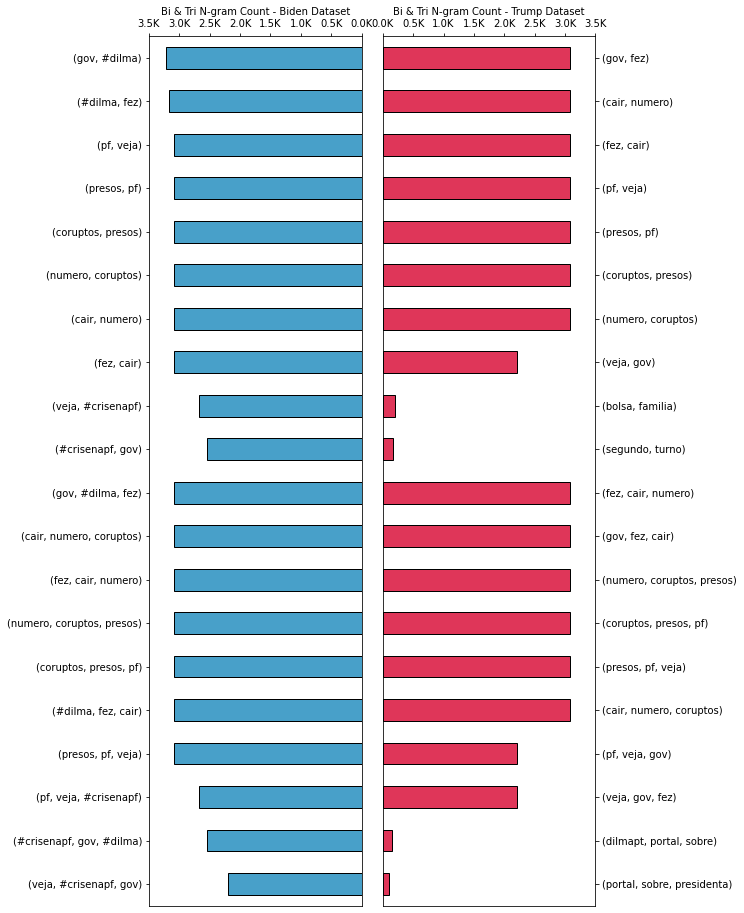

In [17]:
fig, ax=plt.subplots(1,2, figsize=(8,16), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
words_hashtag_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[3],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.xaxis.set_major_formatter(formatterK2)
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Bi & Tri N-gram Count - Biden Dataset')
barh_ax.set_ylabel('')

barh_ax = ax[1]
words_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[6],**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.xaxis.set_major_formatter(formatterK2)
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Bi & Tri N-gram Count - Trump Dataset')
barh_ax.set_ylabel('')
plt.show()